In [ ]:
import numpy as np
import pandas as pd
import boto3
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD


In [ ]:
df_track = pd.read_csv('features_spot.csv', index_col=0)

In [ ]:
print(df_track.shape)
df_track.head()

(1145, 388)


,id,name,artist,artist id,playlist id,danceability,energy,key,loudness,mode,...,underground rap,vapor pop,vapor soul,vapor twitch,vaporwave,vienna indie,viral rap,vocal house,wave,wonky
0,0afGLa6wcYiLLXFZ48ZQpY,Thunder,Roy Blair,6Sa4YbwEdGlfVSJMF1Lp67,søndag,0.667,0.316,0,-9.132,1,...,0,0,0,0,0,0,0,0,0,0
1,3LH6EfPCeySeuymuK2gWAO,Bedroom,Litany,2z6JjrrJKNLilqlx8mlxcc,søndag,0.692,0.452,6,-8.180,1,...,0,0,0,0,0,0,0,0,0,0
2,0bonUwkDjTgQ8URsgCcHhH,Cherry Blossom,Raury,2PU4qFehXQF7WnlFsJpBiJ,søndag,0.805,0.176,7,-20.783,1,...,0,0,0,0,0,0,0,0,0,0
3,3rxYhGVE6GHQyAy4CdGfq1,Pink & Blue (RAC Mix),Tycho,5oOhM2DFWab8XhSdQiITry,søndag,0.671,0.721,5,-7.378,1,...,0,0,0,0,0,0,0,0,0,0
4,2H7Nwzydg8ZusjdWkYqsHy,Redstripe Rhapsody,LAUSSE THE CAT,2Zv7tySETckaR2robozkcz,søndag,0.633,0.326,4,-15.050,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# df_track.columns.tolist()

In [ ]:
to_drop = ['id', 'uri', 'track_href', 'analysis_url', 'type']
df_track = df_track.drop(to_drop, axis=1)

In [ ]:
print(df_track.shape)
df_track.head()

(1145, 383)


,name,artist,artist id,playlist id,danceability,energy,key,loudness,mode,speechiness,...,underground rap,vapor pop,vapor soul,vapor twitch,vaporwave,vienna indie,viral rap,vocal house,wave,wonky
0,Thunder,Roy Blair,6Sa4YbwEdGlfVSJMF1Lp67,søndag,0.667,0.316,0,-9.132,1,0.0262,...,0,0,0,0,0,0,0,0,0,0
1,Bedroom,Litany,2z6JjrrJKNLilqlx8mlxcc,søndag,0.692,0.452,6,-8.180,1,0.1160,...,0,0,0,0,0,0,0,0,0,0
2,Cherry Blossom,Raury,2PU4qFehXQF7WnlFsJpBiJ,søndag,0.805,0.176,7,-20.783,1,0.0617,...,0,0,0,0,0,0,0,0,0,0
3,Pink & Blue (RAC Mix),Tycho,5oOhM2DFWab8XhSdQiITry,søndag,0.671,0.721,5,-7.378,1,0.0384,...,0,0,0,0,0,0,0,0,0,0
4,Redstripe Rhapsody,LAUSSE THE CAT,2Zv7tySETckaR2robozkcz,søndag,0.633,0.326,4,-15.050,0,0.3260,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_track = df_track[(df_track['playlist id'] != '3 x 5') & (df_track['playlist id'] != 'Loss for words')]
df_track = df_track.reset_index(drop=True)

In [ ]:
# profile = ProfileReport(df_track, title="Pandas Profiling Report")
# profile.to_file("profile.html")

In [ ]:
# Could perform a tf-idf type transformation here, prior to PCA:

In [ ]:
gen_list = df_track.iloc[:, 17:].columns

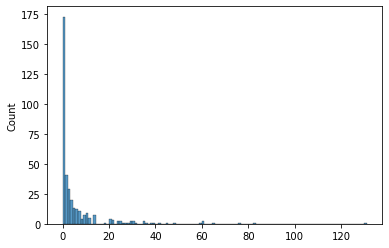

In [ ]:
sns.histplot(df_track[gen_list].sum())
plt.show()

In [ ]:
c = 0.0000001
df_track[['speechiness', 'acousticness', 'instrumentalness']] = df_track[['speechiness', 'acousticness', 'instrumentalness']] + c
df_track[['speechiness', 'acousticness', 'instrumentalness']] = np.log(df_track[['speechiness', 'acousticness', 'instrumentalness']])

In [ ]:
df_track = pd.get_dummies(df_track, prefix=['key', 'time_signature'], columns=['key', 'time_signature'])

In [ ]:
df_track.head()

,name,artist,artist id,playlist id,danceability,energy,loudness,mode,speechiness,acousticness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,Thunder,Roy Blair,6Sa4YbwEdGlfVSJMF1Lp67,søndag,0.667,0.316,-9.132,1,-3.641992,-3.533583,...,0,0,0,0,0,0,0,0,1,0
1,Bedroom,Litany,2z6JjrrJKNLilqlx8mlxcc,søndag,0.692,0.452,-8.180,1,-2.154164,-3.329805,...,1,0,0,0,0,0,0,0,1,0
2,Cherry Blossom,Raury,2PU4qFehXQF7WnlFsJpBiJ,søndag,0.805,0.176,-20.783,1,-2.785470,-2.282781,...,0,1,0,0,0,0,0,0,1,0
3,Pink & Blue (RAC Mix),Tycho,5oOhM2DFWab8XhSdQiITry,søndag,0.671,0.721,-7.378,1,-3.259695,-2.032557,...,0,0,0,0,0,0,0,0,1,0
4,Redstripe Rhapsody,LAUSSE THE CAT,2Zv7tySETckaR2robozkcz,søndag,0.633,0.326,-15.050,0,-1.120858,-0.689155,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_track.drop('playlist id', axis=1), df_track['playlist id'], test_size=0.2, random_state=2021)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [ ]:
X_train.head()

,name,artist,artist id,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,circle the drain,Soccer Mommy,4wXchxfTTggLtzkoUhO86Q,0.482,0.790,-5.221,1,-3.270166,-1.194022,-8.180364,...,0,0,0,1,0,0,0,0,1,0
1,Sloucho Darx,Hermitude,3fmMaLC5jjf2N4EC2kTx0u,0.499,0.708,-4.844,0,-1.609437,-3.897129,-2.447610,...,0,0,0,0,0,0,0,0,1,0
2,By Design,Kid Cudi,0fA0VVWsXO9YnASrzqfmYu,0.756,0.850,-5.885,0,-2.922480,-2.884189,-7.119588,...,0,0,0,1,0,0,0,0,1,0
3,All I Want,Bob Moses,6LHsnRBUYhFyt01PdKXAF5,0.691,0.514,-10.962,1,-3.390254,-2.928072,-0.306525,...,0,0,1,0,0,0,0,0,1,0
4,The Power,David Penn,5kA0fIY29Fnfu4U2I2xvki,0.793,0.847,-6.250,1,-2.189256,-7.992169,-5.521436,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
scale_col = ['danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
X_train[scale_col] = scaler.fit_transform(X_train[scale_col])

In [ ]:
gen_series = pd.Series(gen_list)
gen_series.to_csv('s3://spotify-net/genres_svd.csv')

key_series = pd.Series(X_train.columns[X_train.columns.str.startswith('key_')])
key_series.to_csv('s3://spotify-net/key_list.csv')

time_series = pd.Series(X_train.columns[X_train.columns.str.startswith('time_signature_')])
time_series.to_csv('s3://spotify-net/timeSig_list.csv')

In [ ]:
svd = TruncatedSVD(random_state=2021, n_components=100)
gen_svd = svd.fit_transform(X_train[gen_list])

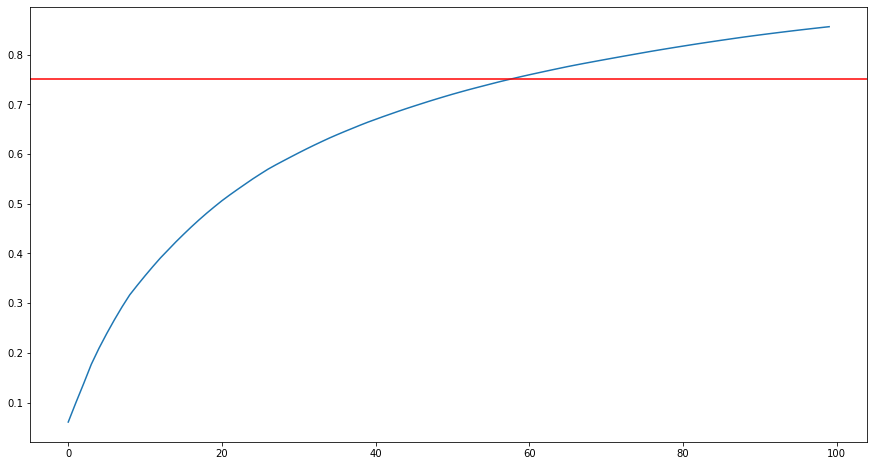

In [ ]:
plt.figure(figsize=(15,8))
exp_var = pd.Series(svd.explained_variance_ratio_).cumsum() 
exp_var.plot()
plt.axhline(0.75, color='r')
plt.show()

In [ ]:
# exp_var[exp_var > 0.75]

In [ ]:
svd = TruncatedSVD(random_state=2021, n_components=60)
gen_svd = svd.fit_transform(X_train[gen_list])

In [ ]:
gen_trans = pd.DataFrame(gen_svd)
gen_trans = gen_trans.add_prefix('genre_')
gen_trans.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,...,genre_50,genre_51,genre_52,genre_53,genre_54,genre_55,genre_56,genre_57,genre_58,genre_59
0,0.066828,1.115194,-0.705494,-0.486558,-0.057863,-0.391308,0.111027,-0.239956,-0.095601,0.054645,...,-0.006432,-0.028857,-0.008851,0.029716,0.095887,-0.045664,0.090556,0.005176,0.002278,-0.010253
1,0.007082,0.197111,0.796033,-0.721187,0.466817,0.152330,-0.022132,-0.055314,0.032847,-0.125844,...,-0.056900,0.005944,-0.022437,0.050209,-0.005624,0.005388,-0.018352,-0.002539,0.049357,-0.028515
2,0.909698,-0.137904,-0.004439,-0.057973,-0.006172,0.011506,0.421177,0.101534,-0.465167,-0.003166,...,-0.013297,-0.003321,-0.010952,-0.039532,-0.080119,-0.141889,0.041441,0.009602,-0.038471,0.018829
3,0.000092,0.003971,0.021130,-0.020260,-0.007076,0.009500,-0.001340,-0.005122,0.001383,-0.010261,...,-0.009628,-0.004337,0.017101,-0.049678,0.051784,-0.053085,-0.046659,-0.133515,-0.040867,-0.002870
4,0.003904,0.089593,0.239347,-0.062151,-0.088640,-0.226324,0.052423,0.320204,0.102592,-0.057428,...,-0.342012,0.029292,-0.214812,0.265645,-0.003640,-0.046678,-0.186356,0.439013,-0.129059,-0.004488


In [ ]:
X_train = X_train.drop(gen_list, axis=1)

In [ ]:
X_train = pd.concat([X_train, gen_trans], axis=1)

In [ ]:
# X_train.isna().any().sum()

In [ ]:
# profile = ProfileReport(X_train, title="Pandas Profiling Report")
# profile.to_notebook_iframe()

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [ ]:
pick_scale = pickle.dumps(scaler) 
pick_svd = pickle.dumps(svd)

s3_resource = boto3.resource('s3')
_ = s3_resource.Object('spotify-net', 'scaler').put(Body=pick_scale)
_ = s3_resource.Object('spotify-net', 'svd').put(Body=pick_svd)

In [ ]:
df_train.to_csv('s3://spotify-net/features_trainSpot.csv')
df_test.to_csv('s3://spotify-net/features_testSpot.csv')